In [17]:
import requests
import networkx
import time
import collections
import matplotlib.pyplot as plt
import networkx as nx
import operator
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib inline

In [263]:
# функция возвращает список друзей
def get_friends_ids(user_id):
    friends_url = 'https://api.vk.com/method/friends.get?user_id={}&v=5.52' 
    # также вы можете добавить access_token в запрос, получив его через OAuth 2.0
    json_response = requests.get(friends_url.format(user_id)).json()
    if json_response.get('error'):
        #print json_response.get('error')
        return list()
    return json_response[u'response']

In [309]:
graph = {}
friend_ids = get_friends_ids(11759642)  # ваш user id, для которого вы хотите построить граф друзей.

In [310]:
num = 1
for friend_id in friend_ids["items"]:
    print (str(num)+". "'Processing id: ', friend_id)
    friend_friends = get_friends_ids(friend_id)
    if len(friend_friends) > 0:
        graph[friend_id] = friend_friends["items"]
    num += 1

1. Processing id:  23459
2. Processing id:  33857
3. Processing id:  70870
4. Processing id:  80626
5. Processing id:  118785
6. Processing id:  118792
7. Processing id:  124836
8. Processing id:  145252
9. Processing id:  234362
10. Processing id:  359220
11. Processing id:  413267
12. Processing id:  455801
13. Processing id:  507102
14. Processing id:  693390
15. Processing id:  729472
16. Processing id:  903169
17. Processing id:  1184416
18. Processing id:  1190378
19. Processing id:  1201469
20. Processing id:  1511262
21. Processing id:  1608101
22. Processing id:  1836671
23. Processing id:  2179882
24. Processing id:  2295476
25. Processing id:  2310243
26. Processing id:  2317078
27. Processing id:  2518343
28. Processing id:  2532735
29. Processing id:  2561808
30. Processing id:  2931571
31. Processing id:  3053709
32. Processing id:  3137238
33. Processing id:  3354420
34. Processing id:  3970502
35. Processing id:  4075727
36. Processing id:  4085926
37. Processing id:  4

282. Processing id:  33632057
283. Processing id:  33872102
284. Processing id:  34241781
285. Processing id:  34547966
286. Processing id:  35088357
287. Processing id:  35225594
288. Processing id:  36081626
289. Processing id:  36267995
290. Processing id:  36799389
291. Processing id:  37668327
292. Processing id:  38076870
293. Processing id:  38116246
294. Processing id:  38140427
295. Processing id:  38699374
296. Processing id:  38763564
297. Processing id:  38932768
298. Processing id:  39038852
299. Processing id:  39451481
300. Processing id:  39668422
301. Processing id:  40022035
302. Processing id:  40656481
303. Processing id:  40753584
304. Processing id:  40849328
305. Processing id:  40981168
306. Processing id:  41457110
307. Processing id:  41633549
308. Processing id:  43628766
309. Processing id:  45050468
310. Processing id:  45304828
311. Processing id:  45698020
312. Processing id:  45983742
313. Processing id:  46751626
314. Processing id:  48333252
315. Proce

In [325]:
g = nx.Graph(directed=False)

In [326]:
myfriends = list(graph.keys())
for i in myfriends:
    g.add_node(i)
    for j in graph[i]:
        if i != j and j in myfriends:
            g.add_edge(i, j)

In [327]:
g = g.subgraph(max(nx.connected_component_subgraphs(g), key=len))

In [328]:
networkx.write_gml(g, "network.gml")

In [329]:
G = nx.relabel_nodes(g, find_name)

In [330]:
networkx.write_gml(G, "network1.gml")

In [10]:
def find_name(id_interest):
    resp=requests.get('https://api.vk.com/method/users.get?user_ids={}&v=5.52'.format(id_interest)).json()[u'response']
    return resp[0][u'first_name'].strip()+' '+resp[0][u'last_name'].strip()

In [11]:
def print_info_about(i, id_interest, G):  
    resp=requests.get('https://api.vk.com/method/users.get?user_ids={}&v=5.52'.format(id_interest)).json()[u'response']
    print(str(i)+". "+resp[0][u'first_name'].strip()+' '+resp[0][u'last_name'].strip()+' '+str(G.degree()[id_interest]))

In [5]:
G1 = nx.read_gml('network.gml')
G = nx.read_gml('network1.gml')

In [6]:
for node in G.nodes():
    if nx.degree(G)[node] < 1:
        G.remove_node(node)

In [7]:
k = nx.degree(G)
k1 = nx.degree(G1)

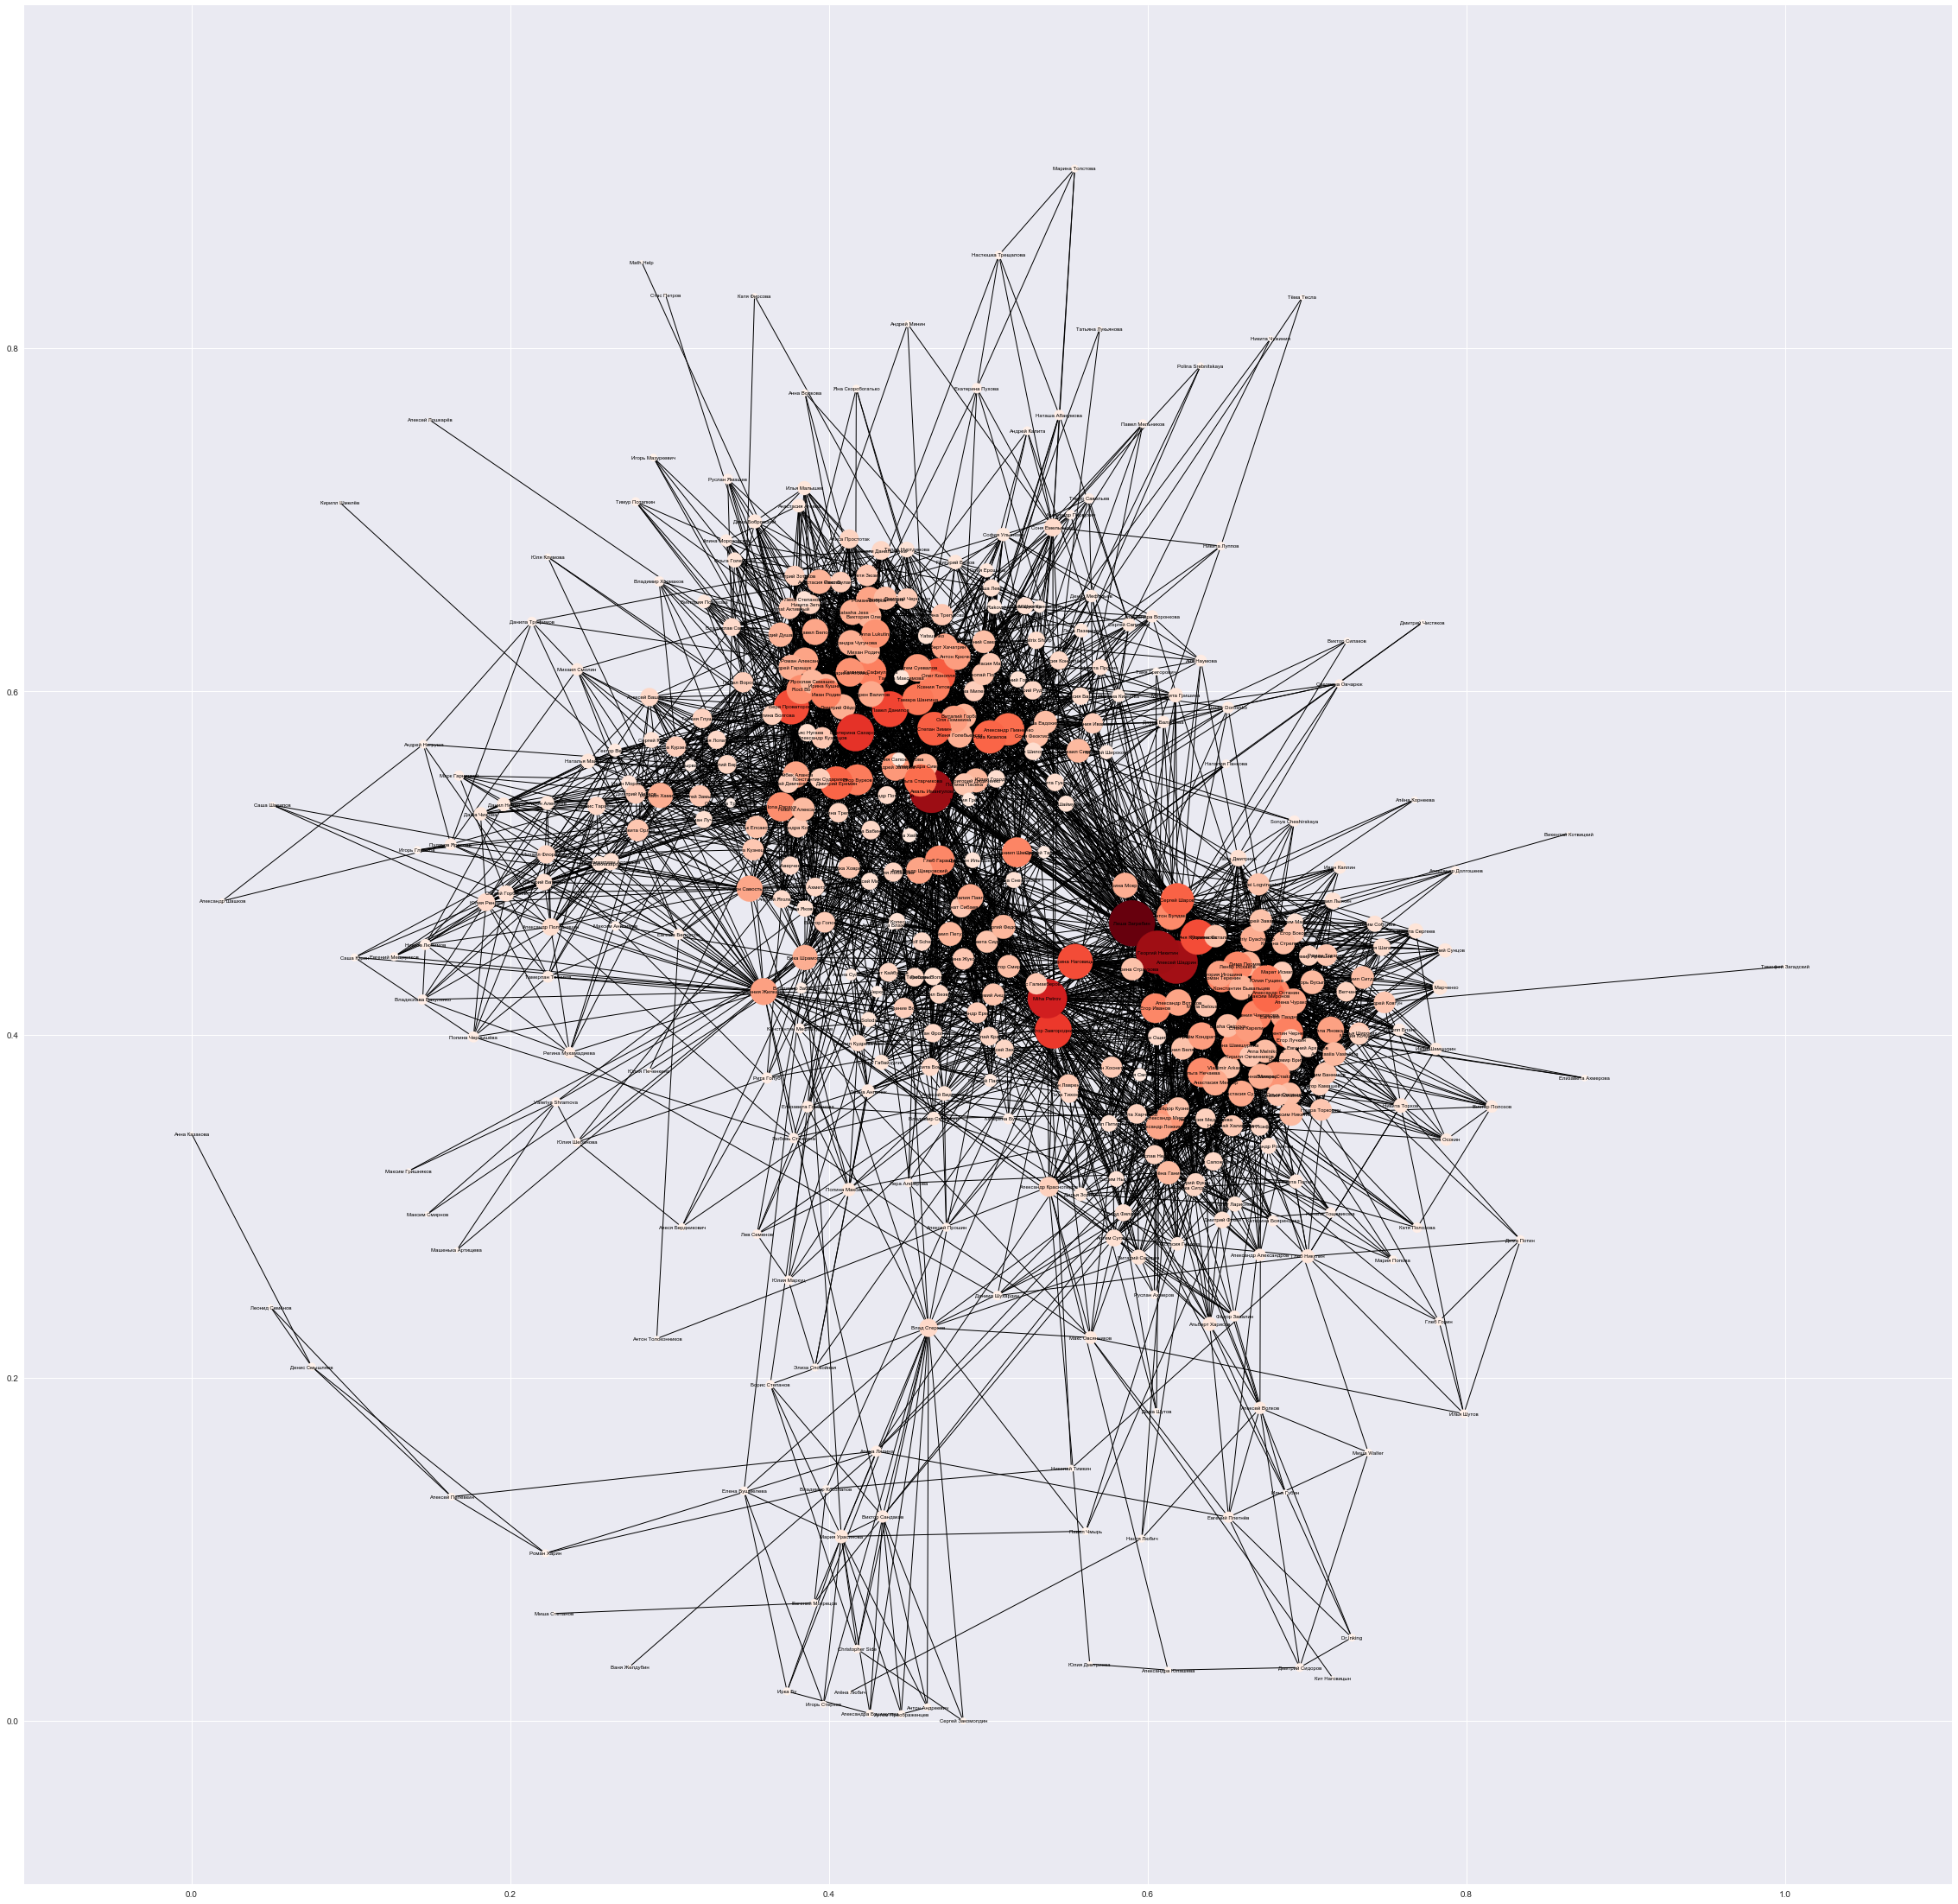

In [18]:
plt.figure(1, figsize=(40,40))
coord = nx.spring_layout(G)
nx.draw_networkx(G,
                 pos=coord,
                 nodelist=list(k.keys()),
                 node_size = [d*20 for d in list(k.values())],
                 node_color=list(k.values()),
                 font_size=6,
                 cmap=plt.cm.Reds,
                 with_labels=True
                 )

In [12]:
k_new = sorted(k1.items(), key=operator.itemgetter(1), reverse=True)
k_new = [x[0] for x in k_new]
for i in range(0,11):
    print_info_about(i+1, k_new[i], G1)

1. Леша Загребин 141
2. Амаль Имангулов 126
3. Георгий Никитин 126
4. Алексей Шадрин 125
5. Miha Petrov 104
6. Екатерина Сахарова 93
7. Егор Завгородний 90
8. Павел Данилов 85
9. Аня Куприянова 82
10. Марина Наговицына 82
11. Вера Проваторова 82


In [345]:
nx.write_gexf(G, "mygraph.gexf")

In [13]:
nx.diameter(G.subgraph(max(nx.connected_component_subgraphs(G), key=len)))

7

In [14]:
nx.average_clustering(G)

0.508731394000387

In [15]:
pd.DataFrame(list(k.items()), columns=["vk_id", "degree"]).to_csv("mygraph.csv")

(array([ 135.,   76.,   70.,   58.,   36.,   14.,   16.,    7.,    4.,
           3.,    1.,    0.,    0.,    3.,    1.]),
 array([   1.        ,   10.33333333,   19.66666667,   29.        ,
          38.33333333,   47.66666667,   57.        ,   66.33333333,
          75.66666667,   85.        ,   94.33333333,  103.66666667,
         113.        ,  122.33333333,  131.66666667,  141.        ]),
 <a list of 15 Patch objects>)

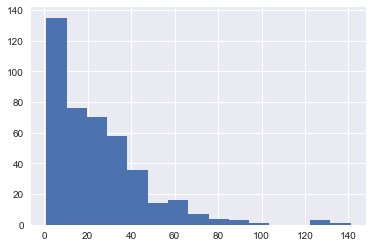

In [19]:
plt.hist(list(G.degree().values()), bins=15)

In [35]:
sorted(nx.degree(G).items(), key=operator.itemgetter(1), reverse=True)

[('Леша Загребин', 141),
 ('Амаль Имангулов', 126),
 ('Георгий Никитин', 125),
 ('Алексей Шадрин', 124),
 ('Miha Petrov', 103),
 ('Екатерина Сахарова', 93),
 ('Егор Завгородний', 90),
 ('Павел Данилов', 85),
 ('Вера Проваторова', 82),
 ('Аня Куприянова', 82),
 ('Марина Наговицына', 82),
 ('Олег Конопля', 77),
 ('Степан Зимин', 75),
 ('Сергей Шаров', 74),
 ('Дмитрий Еремин', 73),
 ('Рома Кизилов', 73),
 ('Максим Миронов', 71),
 ('Ольга Старчикова', 69),
 ('Александр Пивненко', 69),
 ('Тамара Шангина', 65),
 ('Егор Бурков', 63),
 ('Камилла Сафиуллина', 62),
 ('Ксения Титова', 62),
 ('Юлия Гущина', 62),
 ('Иван Родин', 61),
 ('Валентин Чернецов', 61),
 ('Ксения Чистякова', 60),
 ('Даниил Шмырин', 59),
 ('Роман Теренин', 59),
 ('Глеб Гаращук', 58),
 ('Александр Останин', 58),
 ('Егор Иванов', 58),
 ('Ленар Исхаков', 58),
 ('Ольга Нечаева', 57),
 ('Антон Булдаков', 57),
 ('Ilona Papava', 56),
 ('Roct Bb', 56),
 ('Марина Атоянц', 54),
 ('Алёна Шамшурина', 54),
 ('Anna Lukutina', 53),
 ('Вале

In [45]:
k_new = sorted(nx.degree(G).items(), key=operator.itemgetter(1), reverse=True)
for i in range(0,11):
    print(str(i+1)+". ", k_new[i][0], k_new[i][1])

1.  Леша Загребин 141
2.  Амаль Имангулов 126
3.  Георгий Никитин 125
4.  Алексей Шадрин 124
5.  Miha Petrov 103
6.  Екатерина Сахарова 93
7.  Егор Завгородний 90
8.  Павел Данилов 85
9.  Вера Проваторова 82
10.  Аня Куприянова 82
11.  Марина Наговицына 82


In [24]:
bc = nx.betweenness_centrality(G)

In [44]:
k_bc = sorted(bc.items(), key=operator.itemgetter(1), reverse=True)
for i in range(0,11):
    print(str(i+1)+". ", k_bc[i][0], k_bc[i][1])

1.  Леша Загребин 0.08163548584325638
2.  Амаль Имангулов 0.07876352100647693
3.  Miha Petrov 0.07754571845803186
4.  Егор Завгородний 0.07728006781085234
5.  Алексей Шадрин 0.06841680551022343
6.  Георгий Никитин 0.05731699050606005
7.  Ксения Жилкина 0.05356563942745513
8.  Вика Шрамова 0.0389484041403894
9.  Екатерина Сахарова 0.036785856169597286
10.  Марина Наговицына 0.035997777103811
11.  Влад Стерхов 0.034824053237311706


(array([ 361.,   31.,   13.,    8.,    0.,    0.,    3.,    1.,    0.,
           1.,    1.,    0.,    1.,    0.,    4.]),
 array([ 0.        ,  0.00544237,  0.01088473,  0.0163271 ,  0.02176946,
         0.02721183,  0.03265419,  0.03809656,  0.04353893,  0.04898129,
         0.05442366,  0.05986602,  0.06530839,  0.07075075,  0.07619312,
         0.08163549]),
 <a list of 15 Patch objects>)

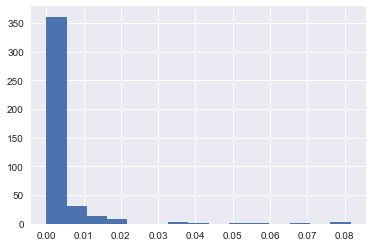

In [39]:
plt.hist(list(bc.values()), bins=15)

In [25]:
cc = nx.closeness_centrality(G)

In [48]:
k_cc = sorted(cc.items(), key=operator.itemgetter(1), reverse=True)
for i in range(0,11):
    print(str(i+1)+". ", k_cc[i][0], k_cc[i][1])

1.  Леша Загребин 0.5472186287192755
2.  Амаль Имангулов 0.5465116279069767
3.  Алексей Шадрин 0.5388535031847134
4.  Miha Petrov 0.5388535031847134
5.  Егор Завгородний 0.5347661188369153
6.  Георгий Никитин 0.52875
7.  Екатерина Сахарова 0.5215782983970407
8.  Марина Наговицына 0.5029726516052319
9.  Павел Данилов 0.5011848341232228
10.  Даниил Шмырин 0.4901506373117034
11.  Степан Зимин 0.4873271889400922


(array([  2.,   1.,   4.,   2.,  18.,  13.,  39.,  51.,  82.,  86.,  74.,
         26.,  17.,   3.,   6.]),
 array([ 0.17559153,  0.20036667,  0.22514181,  0.24991695,  0.27469209,
         0.29946723,  0.32424237,  0.34901751,  0.37379265,  0.39856779,
         0.42334293,  0.44811807,  0.47289321,  0.49766835,  0.52244349,
         0.54721863]),
 <a list of 15 Patch objects>)

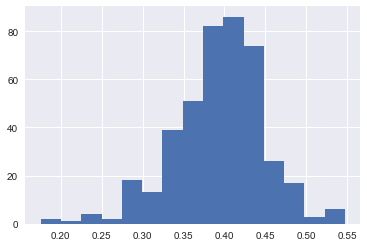

In [27]:
plt.hist(list(cc.values()), bins=15)